<center><h1>Исследуйте, как различные факторы влияют на красоту человека (красота измеряется по шкале от 1 до 5)</h1></center>
В данном датасете необходимо предсказывать столбец `looks`

In [33]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

### Загрузите файл Beauty.csv.

Столбец looks - это красота человека.

In [3]:
df = pd.read_csv("https://raw.githubusercontent.com/Aurilino/Python/master/ingos_studies/seminar1/beauty.csv")
df.head()

,wage,exper,union,service,educ,looks,sex,race,status,health
0,5.73,30,no,yes,14,4,female,white,married,yes
1,4.28,28,no,no,12,3,female,white,married,yes
2,7.96,35,no,no,10,4,female,white,single,yes
3,11.57,38,no,yes,16,3,male,white,married,yes
4,11.42,27,no,no,16,3,male,white,married,yes


## Проведите однофакторный анализ

А именно, исследуйте влияние каждого фактора в отдельности на красоту человека.

Исследование проводите по аналогии с исследованием в ноутбуке Seminar1.ipynb.

Проверим влияние категорийных показателей на показатель "looks"

In [8]:
df.describe()

,wage,exper,educ,looks
count,1260.000000,1260.000000,1260.000000,1260.000000
mean,6.306690,18.206349,12.563492,3.185714
std,4.660639,11.963485,2.624489,0.684877
min,1.020000,0.000000,5.000000,1.000000
25%,3.707500,8.000000,12.000000,3.000000
50%,5.300000,15.000000,12.000000,3.000000
75%,7.695000,27.000000,13.000000,4.000000
max,77.720001,48.000000,17.000000,5.000000


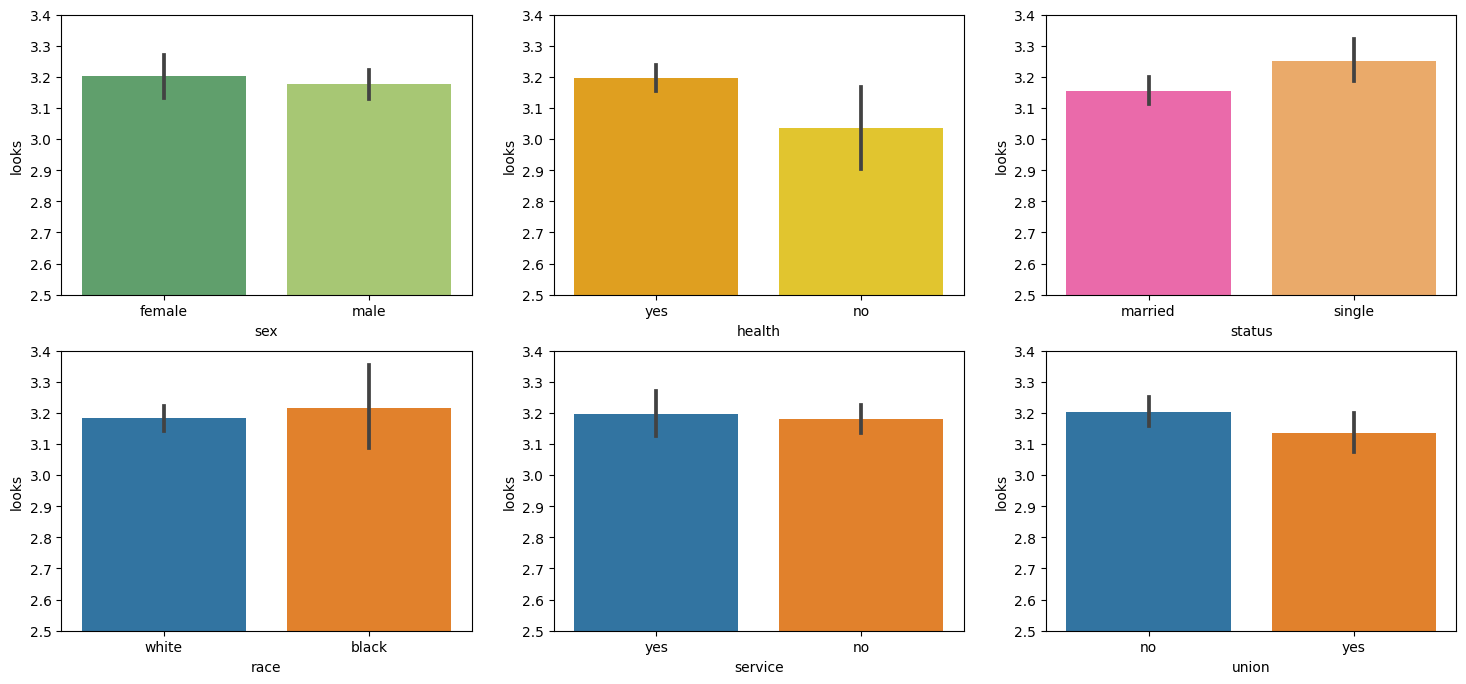

In [46]:
plt.figure(figsize=(18,8))
plt.subplot(2, 3, 1)
plot = sns.barplot(y='looks',x='sex',data=df,palette='tab10',linewidth=3)
plot.set_ylim(2.5, 3.4)
plt.subplot(2, 3, 2)
plot = sns.barplot(y='looks',x='health', data=df,palette='tab10',linewidth=3)
plot.set_ylim(2.5, 3.4)
plt.subplot(2, 3, 3)
plot = sns.barplot(y='looks',x='status', data=df,palette='tab10',linewidth=3)
plot.set_ylim(2.5, 3.4)
plt.subplot(2, 3, 4)
plot = sns.barplot(y='looks',x='race', data=df,palette='tab10',linewidth=3)
plot.set_ylim(2.5, 3.4)
plt.subplot(2, 3, 5)
plot = sns.barplot(y='looks',x='service', data=df,palette='tab10',linewidth=3)
plot.set_ylim(2.5, 3.4)
plt.subplot(2, 3, 6)
plot = sns.barplot(y='looks',x='union', data=df,palette='tab10',linewidth=3)
plot.set_ylim(2.5, 3.4)
plt.show()

Можно обратить внимание:
1) У женшин разборос привлекательности больше чем у мужчин при незначительной разности средних значений;
2) Отсутсвие болезней очень положительно сказывается на привлекателности;
3) Наличие брака ухудшает показатель привлекательности;
4) У людей с черным цветом кожи разборос привлекательности больше чем у мужчин при незначительной разности средних значений;
5) Негативное значение параметра union полдожительно сказывается на привлекательности;
6) Значение показателя service не сказываются на привлекательности, но при наличии параметра service привлекательность имеет более значительный разброс;

Проверим сочетание параметров для пола из-за отсутсвия сильной разницы

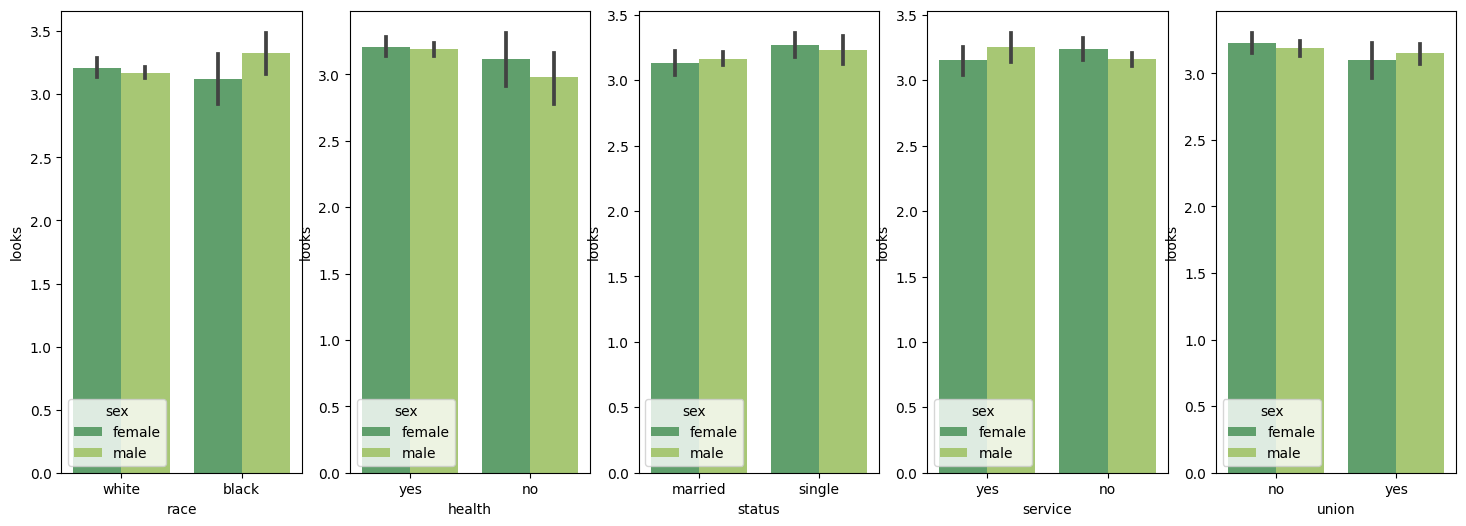

In [47]:
plt.figure(figsize=(18,6))
plt.subplot(1, 5, 1)
plot = sns.barplot(y='looks',hue='sex', x='race', data=df,palette='summer',linewidth=3)
plt.subplot(1, 5, 2)
plot = sns.barplot(y='looks',hue='sex', x='health', data=df,palette='summer',linewidth=3)
plt.subplot(1, 5, 3)
plot = sns.barplot(y='looks',hue='sex', x='status', data=df,palette='summer',linewidth=3)
plt.subplot(1, 5, 4)
plot = sns.barplot(y='looks',hue='sex', x='service', data=df,palette='summer',linewidth=3)
plt.subplot(1, 5, 5)
plot = sns.barplot(y='looks',hue='sex', x='union', data=df,palette='summer',linewidth=3)

Как можно увидеть:

1) У мужчины с черным цветом кожи значительно привлекательней чем. При этом у женьшин всё наоборот;
2) У женшин здоровье не так сильно влияет на привлекательность, чем у мужчин;
3) Замужние женшины менее привлекательны, чем мужчины;
4) Отсутствие параметра service у женшин менее делает их менее привлекательными, чем у мужчин;
5) Отсутствие параметра union у мужчин менее делает их менее привлекательными, чем у женшин.

Проверим влияние числовых показателей на показатель "looks" с помошью корреляции.

In [68]:
print('Для мужчин:')
dfm = df[df.sex == 'male']
print(f'Коррелция зарплаты и привлекательности {np.corrcoef(dfm.wage, dfm.looks)[0,1]:.2%}')
print(f'Коррелция возраста и привлекательности {np.corrcoef(dfm.exper, dfm.looks)[0,1]:.2%}')
print(f'Коррелция уровня образования и привлекательности {np.corrcoef(dfm.educ, dfm.looks)[0,1]:.2%}')

print('Для женщин:')
dff = df[df.sex == 'female']
print(f'Коррелция зарплаты и привлекательности {np.corrcoef(dff.wage, dff.looks)[0,1]:.2%}')
print(f'Коррелция возраста и привлекательности {np.corrcoef(dff.exper, dff.looks)[0,1]:.2%}')
print(f'Коррелция уровня образования и привлекательности {np.corrcoef(dff.educ, dff.looks)[0,1]:.2%}')

Для мужчин:
Коррелция зарплаты и привлекательности 5.62%
Коррелция возраста и привлекательности -16.10%
Коррелция уровня образования и привлекательности 16.74%
Для женщин:
Коррелция зарплаты и привлекательности 7.90%
Коррелция возраста и привлекательности -14.74%
Коррелция уровня образования и привлекательности 12.91%


## Промежуточные выводы



<h2>Машинное обучение</h2>

1. Закодируйте все категориальные признаки с помощью OneHotEncoding.

2. Разбейте данные на train и test.

3. Обучите несколько алгоритмов классификации на полученных данных и выведите на экран качество (accuracy) каждого алгоритма на train и test.

<h2>Линейная регрессия</h2>

In [278]:
base = pd.get_dummies(df,columns=['sex','race','health','status','service','union'],dtype = int)
X,y = base[['wage', 'exper', 'educ', 'sex_female', 'sex_male','race_black', 'race_white', 'health_no', 'health_yes', 'status_married','status_single', 'service_no', 'service_yes', 'union_no', 'union_yes']], \
      base[['looks']]

In [279]:
import statsmodels.api as sm
x2 = sm.add_constant(X)
est = sm.OLS(y, x2)
est2 = est.fit()
print(est2.summary())

                            OLS Regression Results                            
Dep. Variable:                  looks   R-squared:                       0.049
Model:                            OLS   Adj. R-squared:                  0.042
Method:                 Least Squares   F-statistic:                     7.132
Date:                Sun, 16 Jul 2023   Prob (F-statistic):           3.91e-10
Time:                        22:14:46   Log-Likelihood:                -1278.9
No. Observations:                1260   AIC:                             2578.
Df Residuals:                    1250   BIC:                             2629.
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const              0.7128      0.029     24.

<h2>Логическая регрессия</h2>

In [63]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LogisticRegression

model = LogisticRegression()

In [290]:
acur[acur.Logic == acur.Logic.max()].Logic.tolist()[0]

0.5904761904761905

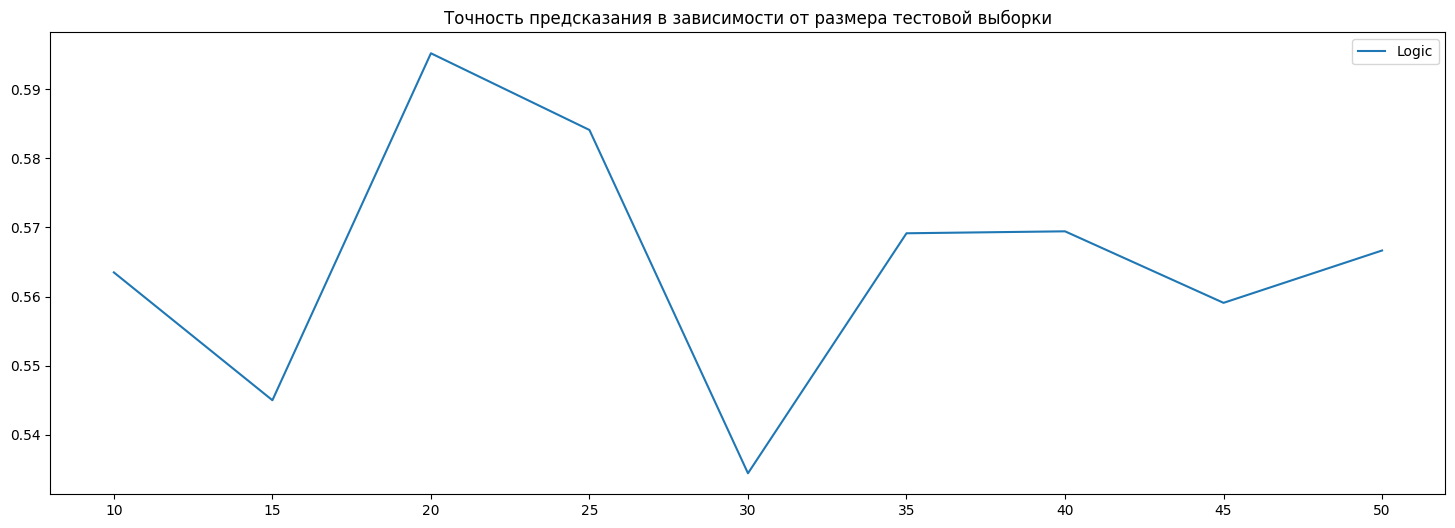

Размер тестовой выборки: 20% - точность предсказания 59.52%.


In [292]:
acur = pd.DataFrame(columns=['Logic'])
for i in range(10,55,5):
    train_x,test_x,train_y,test_y = train_test_split(X,y,test_size = i/100)
    model.fit(train_x,train_y)
    target = model.predict(test_x)
    acur = acur.append({'Logic': accuracy_score(target,test_y)}, ignore_index=True)
acur.index = range(10,55,5)
acur.plot(figsize=(18,6), title='Точность предсказания в зависимости от размера тестовой выборки')
plt.show()
print(f'Размер тестовой выборки: {acur[acur.Logic == acur.Logic.max()].index[0]}% - точность предсказания {float(acur[acur.Logic == acur.Logic.max()].Logic.tolist()[0]):.2%}.')
# Рабочее разбиение на тренировочную и тестовую выборки
train_x,test_x,train_y,test_y = train_test_split(X,y,test_size = acur[acur.Logic == acur.Logic.max()].index[0]/100)

<h2>Дерево решений</h2>

In [245]:
from sklearn.svm import LinearSVC
from sklearn.tree import DecisionTreeClassifier,export_graphviz
from sklearn.ensemble import RandomForestClassifier
from IPython.display import SVG
from IPython.display import display
from graphviz import Source
from IPython.display import HTML
import os 

style = "<style>svg{width:80% !important;height:80% !important;}</style>"
os.environ["PATH"] += os.pathsep + 'C:/Program Files/Graphviz2.38/bin'

In [296]:
dtc = DecisionTreeClassifier(random_state=42)
params = {'criterion': ['gini', 'entropy'],
          'max_depth': range(1, 10),
          'min_samples_leaf': range(1, 20)}
tr = GridSearchCV(dtc, params, cv=3).fit(train_x,train_y)
print(f'Процент корректных предсказаний: {tr.score(test_x,test_y): 2%}')

Процент корректных предсказаний:  56.746032%


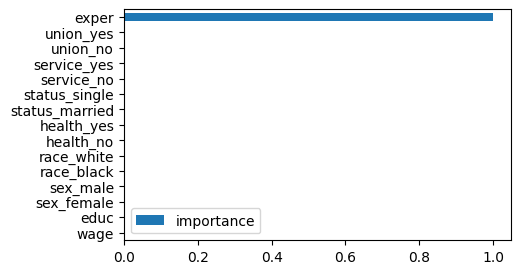

In [297]:
imj = pd.DataFrame(tr.best_estimator_.feature_importances_, index=train_x.columns, columns=['importance'])
ax = imj.sort_values('importance').plot(kind='barh', figsize=(5, 3))

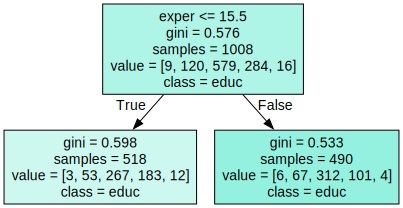

In [298]:
dtc = DecisionTreeClassifier(criterion=tr.best_params_['criterion'],
                            max_depth=tr.best_params_['max_depth'],
                            min_samples_split=tr.best_params_['min_samples_leaf'])
graph = Source(export_graphviz(dtc.fit(train_x,train_y), out_file=None, 
                                    feature_names=train_x.columns.tolist(), 
                                    class_names=train_x.columns.tolist(), 
                                    filled=True))
display(SVG(graph.pipe(format='svg')))

График переобучения модели

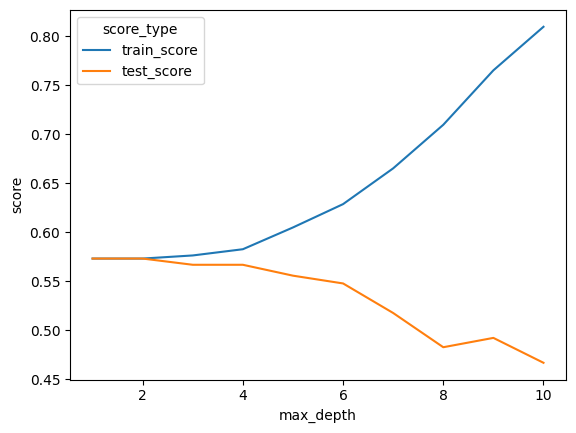

In [249]:
# Список максимальных глубины
max_depth_values = range(1,11)
# Датафрейм с результатами
scores = pd.DataFrame()
for i in max_depth_values:
    # Тренировка дерева с заданной глубиной
    clf = DecisionTreeClassifier(criterion='entropy', max_depth=i) 
    train_score = clf.fit(train_x,train_y).score(train_x,train_y)
    test_score = clf.fit(train_x,train_y).score(test_x,test_y)
    temp = pd.DataFrame({'max_depth': [i],
                        'train_score': [train_score],
                        'test_score': [test_score]})
    scores = scores.append(temp)
scores = pd.melt(scores, id_vars=['max_depth'], 
                value_vars=['train_score', 'test_score'],
                var_name='score_type', value_name='score')
ax = sns.lineplot(x='max_depth', y='score', hue='score_type', data = scores)

<h2>Случайный лес</h2>

In [299]:
dtc_f = RandomForestClassifier(random_state=42)
params = {'criterion': ['gini', 'entropy'],
          'max_depth': range(1, 10),
          'min_samples_leaf': range(1, 10)}
tr_f = GridSearchCV(dtc_f, params, cv=3).fit(train_x,train_y)
print(f'Процент корректных предсказаний: {tr_f.score(test_x,test_y): 2%}')

Процент корректных предсказаний:  56.746032%


In [301]:
tr_f.best_params_

{'criterion': 'gini', 'max_depth': 4, 'min_samples_leaf': 6}

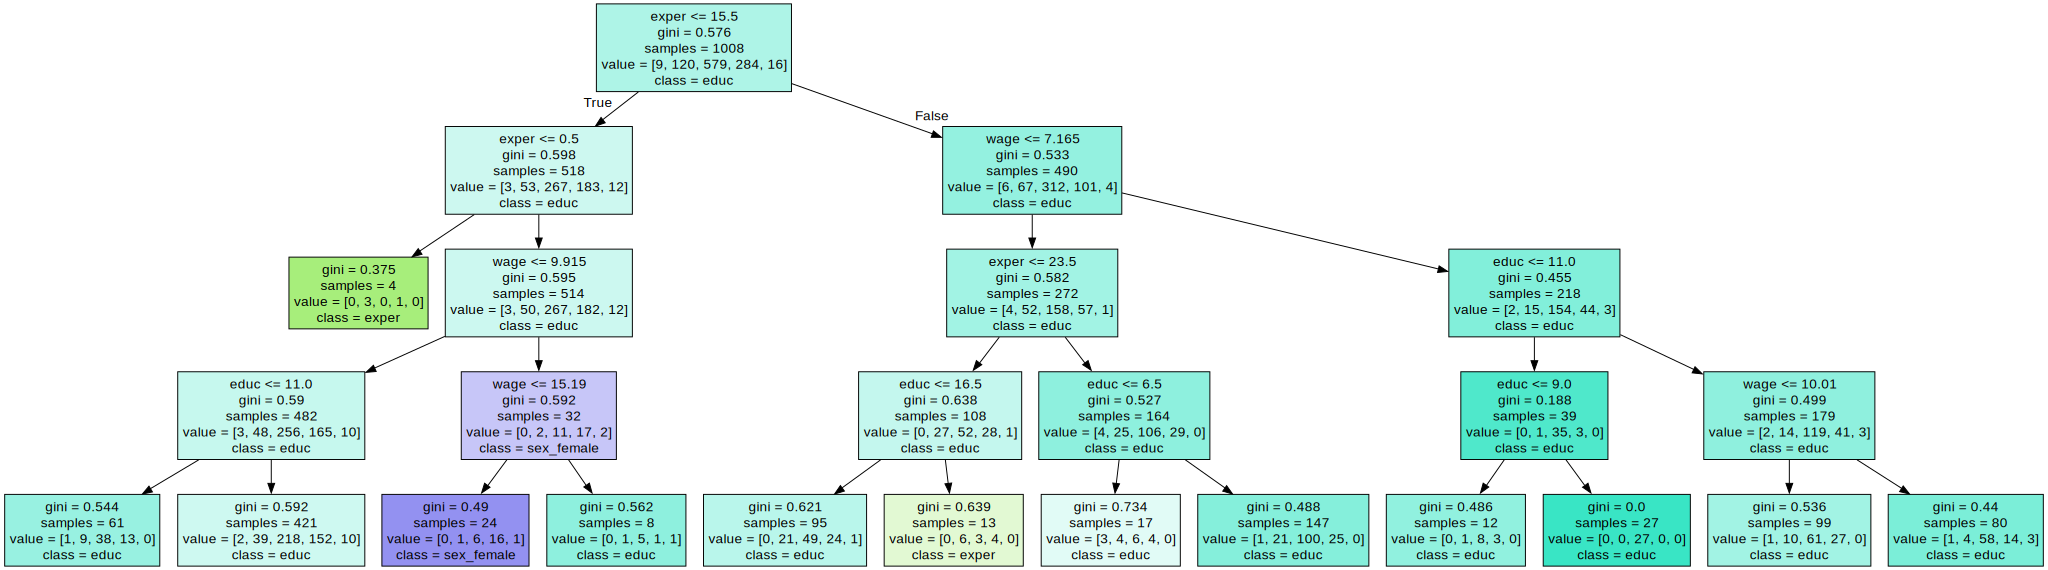

In [302]:
dtc_f = DecisionTreeClassifier(criterion=tr_f.best_params_['criterion'],
                            max_depth=tr_f.best_params_['max_depth'],
                            min_samples_split=tr_f.best_params_['min_samples_leaf'])
graph = Source(export_graphviz(dtc_f.fit(train_x,train_y), out_file=None, 
                                    feature_names=train_x.columns.tolist(), 
                                    class_names=train_x.columns.tolist(), 
                                    filled=True))
display(SVG(graph.pipe(format='svg')))

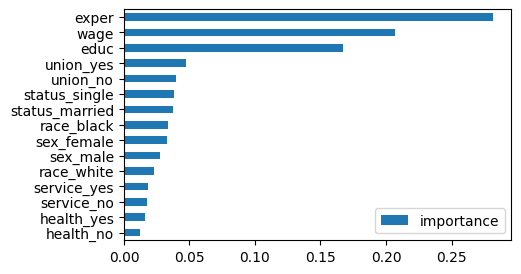

In [303]:
imj = pd.DataFrame(tr_f.best_estimator_.feature_importances_, index=train_x.columns, columns=['importance'])
ax = imj.sort_values('importance').plot(kind='barh', figsize=(5, 3))

График переобучения модели

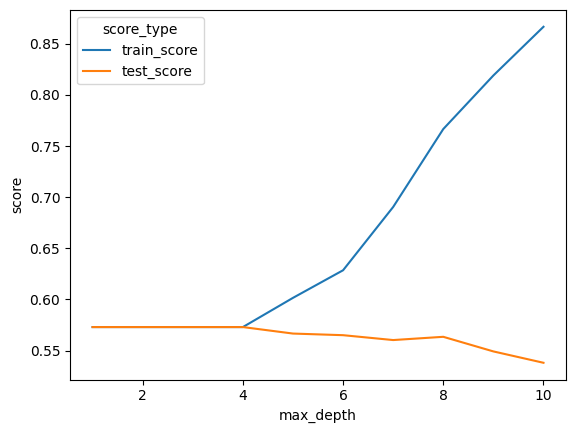

In [256]:
# Список максимальных глубины
max_depth_values = range(1,11)
# Датафрейм с результатами
scores = pd.DataFrame()
for i in max_depth_values:
    # Тренировка дерева с заданной глубиной
    clf_rf = RandomForestClassifier(criterion='entropy', max_depth=i) 
    train_score = clf_rf.fit(train_x,train_y).score(train_x,train_y)
    test_score = clf_rf.fit(train_x,train_y).score(test_x,test_y)
    temp = pd.DataFrame({'max_depth': [i],
                        'train_score': [train_score],
                        'test_score': [test_score]})
    scores = scores.append(temp)
scores = pd.melt(scores, id_vars=['max_depth'], 
                value_vars=['train_score', 'test_score'],
                var_name='score_type', value_name='score')
ax = sns.lineplot(x='max_depth', y='score', hue='score_type', data = scores)

In [ ]:
imp = pd.DataFrame(best_clf_rf.feature_importances_, index=X_train.columns, columns=['importance'])
ax = imp.sort_values('importance').plot(kind='barh', figsize=(5, 3))

<center><h1>Сделайте выводы</h1></center>

1. Какой или какие факторы больше всего влияют на красоту человека?
2. Какой алгоритм сработал лучше всего?
3. Какой алгоритм больше всего переобучился? (качество на валидационной выборке гораздо ниже, чем качество на обучающей, при этом качество на обучающей выборке достаточно высокое).

<center><h1>Выводы</h1></center>

1)
На привлекательность сильее всего влияет здовье.  
Для мужчин так-же сильное влияет цвет кожи.  
Возраст имеет отрицательную корреляцию как для мужчин, так и для женшин, при этом уровень образования сильнее сказывается на привлекательность мужчин.
2)
Дерево решений(др), как Случайный лес(сл) показали похожий и посредственный результат. 
3)
Самая большая точность получилась у Логической регрессии